In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 71.6 MB/s 
     |████████████████████████████████| 120 kB 66.3 MB/s 


In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.1 MB/s 
     |████████████████████████████████| 199 kB 56.0 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import re
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, AutoTokenizer
import datetime

# # # specify GPU
# device = torch.device('cuda')


In [2]:
df1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\Zheyu\Dossier final Zheyu Xiao\Accords labellisés par datamatics\df_correspondance_id.xlsx')
df2 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\Zheyu\Dossier final Zheyu Xiao\Accords labellisés par datamatics\grid_to_fill_Delivery_Compliance.xlsx')

In [3]:
df1.head()

,Unnamed: 0,legifrance_id,id,path,contenu
0,0,A01817001004,ACCOTEXT000036149055,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\n\n\n\n\n\n\n\n\n\n\n\nACCORD SUR LA MISE E...
1,1,A07518030290,ACCOTEXT000036954180,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\nACCORD RELATIF AU TELETRAVAIL \nAU SEIN DE...
2,2,A02617002643,ACCOTEXT000036149070,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\n\n\nMSA ARDECHE DROME LOIRE\n\nACCORD D'EN...
3,3,A06918013879,ACCOTEXT000036954113,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,ACCORD RELATIF \n\nA LA MISE EN PLACE DE DISPO...
4,4,A04217003915,ACCOTEXT000036508856,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\nAVENANT N° 1 DU 5 SEPTEMBRE 2017\nA l’ACCORD...


In [4]:
for i in range(len(df2)):
  df2.iloc[i,1] = re.search(r'[A].*',df2.iloc[i,1]).group(0)

In [5]:
df0 = pd.merge(df1, df2,how = "inner",left_on = "id",right_on="id")

In [6]:
df0.columns

Index(['Unnamed: 0_x', 'legifrance_id', 'id', 'path', 'contenu',
       'Unnamed: 0_y', 'Renewal of an older telework agreement\n(0=NO, 1=YES)',
       'Number of days of teleworking if specified by WEEK                                    (0, 1, 2, 3, 4, 5, 6 IF THE NUMBER OF DAYS IS PER WEEK ; ELSE NaN)',
       'Number of days of teleworking if specified by MONTH                                     (0 TO 31 IF THE NUMBER OF DAYS IS PER MONTH ; ELSE NaN)',
       'Number of days of teleworking if specified by YEAR                                                                           (0 TO 365 IF THE NUMBER OF DAYS IS PER YEAR ; IF PER TRIMESTER/SEMESTER CONVERT THE NUMBER AND PUT IN THIS COLUMN ; ELSE NaN)',
       'Training managers to remote management is scheduled (0=NO, 1=YES)',
       'Measures for the Right to Disconnect OR a reference to a Right to Disconnect agreement are planned\n (0=NO, 1=YES)',
       'Coverage of costs of telework (Internet subscription, electricity, h

In [7]:
df0.head()

,Unnamed: 0_x,legifrance_id,id,path,contenu,Unnamed: 0_y,"Renewal of an older telework agreement\n(0=NO, 1=YES)","Number of days of teleworking if specified by WEEK (0, 1, 2, 3, 4, 5, 6 IF THE NUMBER OF DAYS IS PER WEEK ; ELSE NaN)",Number of days of teleworking if specified by MONTH (0 TO 31 IF THE NUMBER OF DAYS IS PER MONTH ; ELSE NaN),Number of days of teleworking if specified by YEAR (0 TO 365 IF THE NUMBER OF DAYS IS PER YEAR ; IF PER TRIMESTER/SEMESTER CONVERT THE NUMBER AND PUT IN THIS COLUMN ; ELSE NaN),"Training managers to remote management is scheduled (0=NO, 1=YES)","Measures for the Right to Disconnect OR a reference to a Right to Disconnect agreement are planned\n (0=NO, 1=YES)","Coverage of costs of telework (Internet subscription, electricity, heater, consumables) by the company (0=NO, 1=YES)","Working time is controlled: Can be a declaration of worked hours by the employee, or can be a control made by the employer (for example the employee must log-in to a platform to monitor their presence,...) (0=NO, 1=YES)","The employee is required to work the same schedule as in the office (0=NO, 1=YES)",Unnamed: 11,Comments
0,0,A01817001004,ACCOTEXT000036149055,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\n\n\n\n\n\n\n\n\n\n\n\nACCORD SUR LA MISE E...,2,0,3.0,NaN,NaN,0,1,1,0,1,NaN,NaN
1,1,A07518030290,ACCOTEXT000036954180,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\nACCORD RELATIF AU TELETRAVAIL \nAU SEIN DE...,121,0,1.0,NaN,NaN,1,1,1,1,0,NaN,NaN
2,2,A02617002643,ACCOTEXT000036149070,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\n\n\n\nMSA ARDECHE DROME LOIRE\n\nACCORD D'EN...,3,0,2.0,NaN,NaN,0,0,1,1,1,NaN,NaN
3,3,A06918013879,ACCOTEXT000036954113,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,ACCORD RELATIF \n\nA LA MISE EN PLACE DE DISPO...,118,0,2.0,NaN,NaN,0,0,0,1,0,NaN,NaN
4,4,A04217003915,ACCOTEXT000036508856,F:\Groupe alpha ordi\Stage CREST\Stage CREST\E...,\nAVENANT N° 1 DU 5 SEPTEMBRE 2017\nA l’ACCORD...,20,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN


In [8]:
df = df0[['contenu','Training managers to remote management is scheduled (0=NO, 1=YES)']]
# df = df245[['contenu_eng','Formation']]
# df = df245[['contenu_eng','droit à la déconnexion']]
# df = df245[['contenu_eng','contrôle du TT']]

df.columns = ['text','label']
df = df.replace(r'\n',' ', regex=True)
df = df.astype({"text": str})

<Axes: >

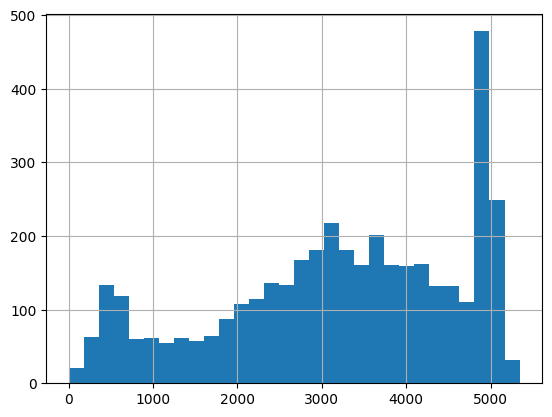

In [9]:
seq_len1 = [len(i.split()) for i in df["text"]]

pd.Series(seq_len1).hist(bins = 30)

In [10]:
def getlen(x):
  if len(x.split()) <= 4000:
    return 1
  else:
    return 0

In [11]:
df["len"] = df["text"].apply(getlen)

In [12]:
df = df[df["len"]==1]

In [13]:
len(df)

2614

In [14]:
df.head()

,text,label,len
3,ACCORD RELATIF A LA MISE EN PLACE DE DISPOSI...,0,1
4,AVENANT N° 1 DU 5 SEPTEMBRE 2017 A l’ACCORD S...,0,1
5,ACCORD SUR LE TELETRAVAIL Entre La Société...,0,1
6,ACCORD SUR LE TELETRAVAIL Entre La Société...,0,1
7,TELETRAVAIL DISPOSITIF CADRE V.SHIPS Fra...,0,1


In [15]:
len(df[df['label']==1])

420

In [16]:
len(df[df['label']==0])

2194

In [17]:
df.isna().sum()

text     0
label    0
len      0
dtype: int64

In [18]:
df["label"] = df["label"].astype(int)

In [19]:
df.dtypes

text     object
label     int32
len       int64
dtype: object

In [20]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df[['text']], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

temp_text = temp_text.squeeze()
temp_labels = temp_labels.squeeze()

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.28, 
                                                                stratify=temp_labels)

In [21]:
from collections import Counter
print(sorted(Counter(train_labels).items()))

[(0, 1535), (1, 294)]


In [ ]:
ros = RandomOverSampler(random_state=42)
train_text, train_labels= ros.fit_resample(train_text, train_labels)

In [ ]:
# rus = RandomUnderSampler(random_state=42)
# train_text, train_labels= rus.fit_resample(train_text, train_labels)

In [ ]:
from collections import Counter
print(sorted(Counter(train_labels).items()))

[(0, 1535), (1, 1535)]


In [ ]:
train_text = train_text.squeeze()
train_labels = train_labels.squeeze()


In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('allenai/longformer-base-4096')

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096", gradient_checkpointing=True, use_cache=False)

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

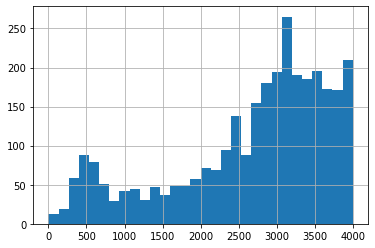

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 4000,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 4000,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 4000,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 16

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self,bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels)

print("Class Weights:",class_weights)

Class Weights: [1. 1.]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 4 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch     4  of    192.
  Batch     8  of    192.
  Batch    12  of    192.
  Batch    16  of    192.
  Batch    20  of    192.
  Batch    24  of    192.
  Batch    28  of    192.
  Batch    32  of    192.
  Batch    36  of    192.
  Batch    40  of    192.
  Batch    44  of    192.
  Batch    48  of    192.
  Batch    52  of    192.
  Batch    56  of    192.
  Batch    60  of    192.
  Batch    64  of    192.
  Batch    68  of    192.
  Batch    72  of    192.
  Batch    76  of    192.
  Batch    80  of    192.
  Batch    84  of    192.
  Batch    88  of    192.
  Batch    92  of    192.
  Batch    96  of    192.
  Batch   100  of    192.
  Batch   104  of    192.
  Batch   108  of    192.
  Batch   112  of    192.
  Batch   116  of    192.
  Batch   120  of    192.
  Batch   124  of    192.
  Batch   128  of    192.
  Batch   132  of    192.
  Batch   136  of    192.
  Batch   140  of    192.
  Batch   144  of    192.
  Batch   148  of    192.
  Batch   152  of    19

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path,map_location=torch.device('cpu')))

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()
# cuda.select_device(0)

In [ ]:
# !pip install GPUtil

# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache()     

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(torch.device('cpu')), test_mask.to(torch.device('cpu')))
  preds = preds.detach().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))